In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline # 주피터에서 바로 볼 수 있게 해줌

In [26]:
#데이터 가져오기

PATH = os.path.join("datasets","redwine")

def load_data(filename, path = PATH):
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path)

wine = load_data("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


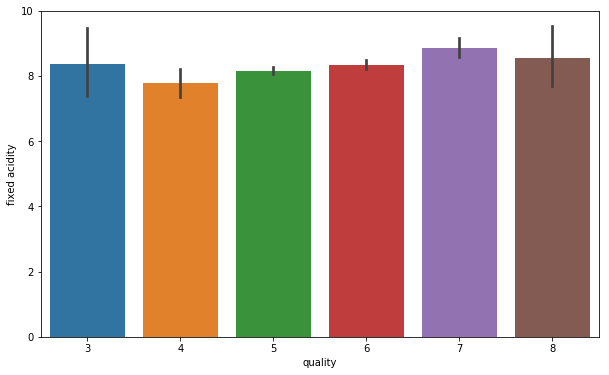

In [28]:
# fixed acidity가 quality에 분류하는 데 별 도움이 되지 않는다.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

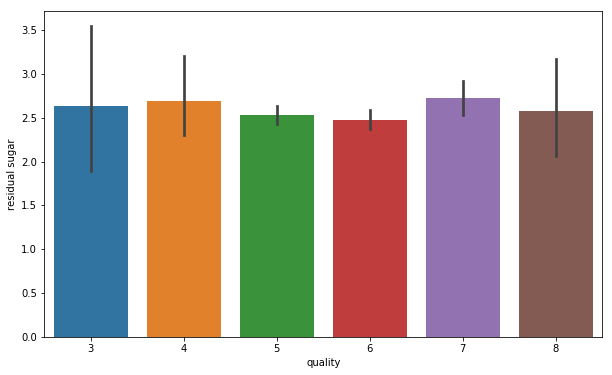

In [29]:
# residual sugar도 도움안됨
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

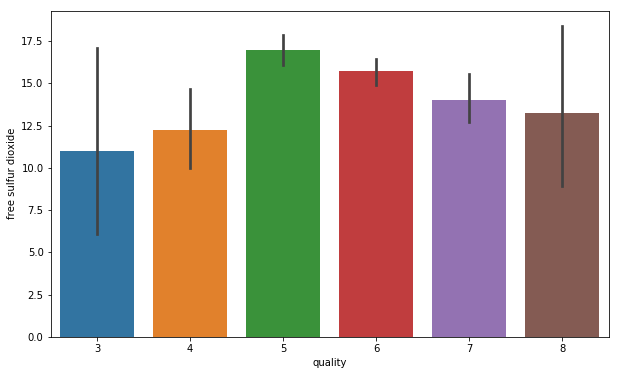

In [30]:
#도움안됨
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

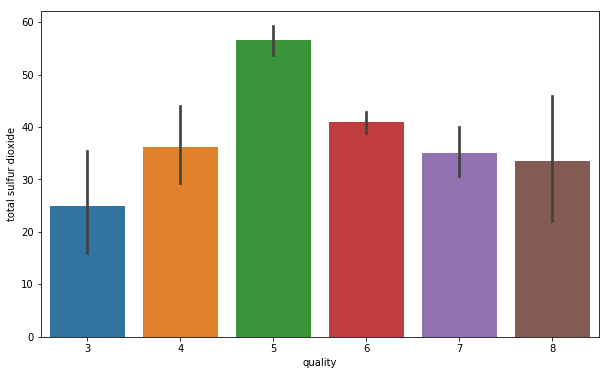

In [31]:
#도움안됨
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

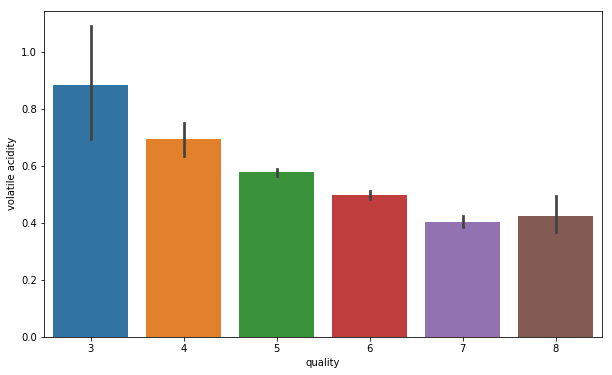

In [32]:
# volatile acidity이 낮아질수록 quality는 올라감
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

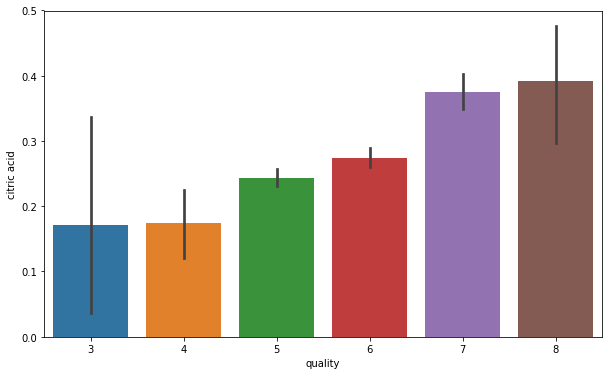

In [33]:
# citric acid(구연산)가 높을수록 quality가 높아짐
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

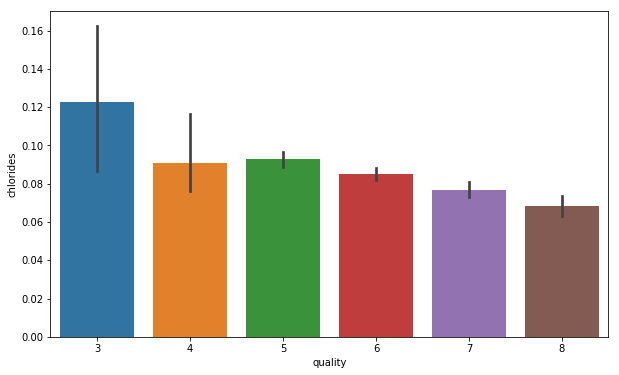

In [34]:
# chloride(염화물)이 낮을수록 quality는 높아진다
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

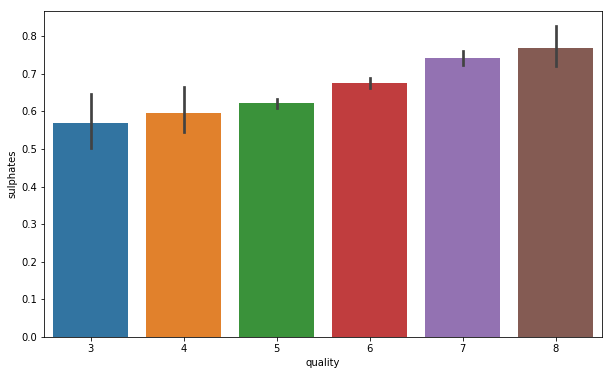

In [35]:
# sulphates이 높을수록 quality도 높아진다
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

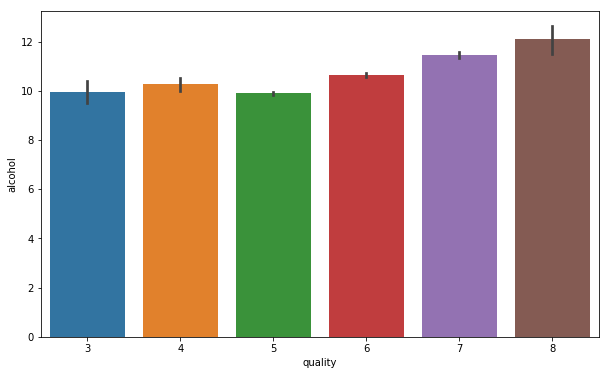

In [36]:
#Alcohol이 높아질수록 quailty도 높아졌다
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [37]:
######bins : 구간을 나눠줄 숫자값
# 이진분류기 만들기
# quality에 한계를 줘서 good과 bad로 나눔
group_names = ['bad', 'good']
bins = (2, 6.5, 8)
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [38]:
# 품질에 라벨 할당 가능
label_quality = LabelEncoder()

In [39]:
# bad는 0, good은 1
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [40]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

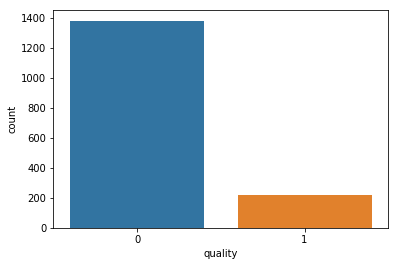

In [41]:
#시각화
sns.countplot(wine['quality'])

In [42]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [58]:
# Train셋 Test셋 나누기
# test사이즈 0.2는 비율
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
# 스탠다드 스케일러 적용

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [45]:
# 랜덤 포레스트

rfc = RandomForestClassifier(n_estimators=200) # 200 트리개수
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94       273
           1       0.78      0.45      0.57        47

   micro avg       0.90      0.90      0.90       320
   macro avg       0.84      0.71      0.76       320
weighted avg       0.89      0.90      0.89       320



In [56]:
# 1인데 0이라고 한게 26, 0인데 1이라고한게 6개
print(confusion_matrix(y_test, pred_rfc))

[[267   6]
 [ 26  21]]


In [47]:
# sgd최적화 방법은 일부 표본 데이터만 사용한 gradient의 추정치를 이용하는 방법
sgd = SGDClassifier(penalty=None) # 정규화 조건 none
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

C:\Users\TEI\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [48]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       273
           1       0.44      0.36      0.40        47

   micro avg       0.84      0.84      0.84       320
   macro avg       0.66      0.64      0.65       320
weighted avg       0.83      0.84      0.83       320



In [49]:
print(confusion_matrix(y_test, pred_sgd))

[[251  22]
 [ 30  17]]


In [50]:
# 소프트벡터
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [51]:
#모델의 정확성을 높이기
# 그리드 서치 CV
#(자동으로 복수개의 내부 모형을 생성하고 이를 모두 실행시켜 최적의 파라미터를 찾아준다)

#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [52]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [53]:
# 최적의 파라메타를 찾은 결과
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [54]:
# svc에 그걸 넣어서 다시 돌려본다
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

   micro avg       0.90      0.90      0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



In [55]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9155880905511811